<a href="https://colab.research.google.com/github/DhekerKacem/pfe_artefact/blob/dev/pfe_artefact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Chargement des bibliothéques.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Définition du chemin de sauvegarde sur Google Drive
save_directory = '/content/drive/My Drive/olist_data'

import os
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

Mounted at /content/drive


#### Chargement de la base de données.

In [ ]:
data = pd.read_csv('/content/drive/My Drive/olist_data/fr.openfoodfacts.org.products.csv', sep='\t')

<ipython-input-3-798f366720be>:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/My Drive/olist_data/fr.openfoodfacts.org.products.csv', sep='\t')


#### Exploration préliminaires du data frame.

In [ ]:
pd.set_option('display.max_columns', 200)

In [ ]:
data.head(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

In [ ]:
data.shape

(320772, 162)

Notre data frame se compose de 162 variables(colonnes) et de 320772 observations(individus). Cette base de données est gérée par l'agence Santé Publique France en partenariat avec l'association Open Food Facts, elle est open source et est mise à disposition, aussi bien de particuliers que d'organisations afin de leurs permettre de s'informer sur les qualités nutritionnelles des produits répertoriés.
Cette base de données alimente, en outre, l'application Openfoodfacts.
L'observation de la ligne ci-dessous me permet de conclure de l'existence de plusieurs valeurs manquantes et ceci concerne quasiment toutes les variables de la base de données.

In [ ]:
pd.options.display.max_rows = 162
data.isnull().sum().sort_values(ascending=False)

,0
water-hardness_100g,320772
no_nutriments,320772
ingredients_that_may_be_from_palm_oil,320772
nutrition_grade_uk,320772
nervonic-acid_100g,320772
erucic-acid_100g,320772
mead-acid_100g,320772
elaidic-acid_100g,320772
butyric-acid_100g,320772
caproic-acid_100g,320772


Notre data frame comprend un grand nombre de valeurs manquantes. Pour certaines variables, il y a zéro observation.

### Proposition de la problématique

Le Nutri-Score est-il un indicateur pertinent pour évaluer la qualité nutritionnelle des aliments ?
Sous-thématiques sélectionnées
1) Corrélation entre le Nutri-Score et les caractéristiques nutritionnelles
- Quels nutriments influencent le plus le Nutri-Score (lipides, sucres, fibres, protéines) ?
- Existe-t-il des incohérences entre la composition nutritionnelle et le score attribué ?

2) Analyse des écarts entre pays d’origine
- Le Nutri-Score est-il équitable pour tous types d’aliments quel que soit le pays?
- Certains pays sont-ils favorisés ou pénalisés de manière disproportionnée ?

3) Impact des ingrédients ultra-transformés et des additifs.
- Le Nutri-Score prend-il suffisamment en compte le degré de transformation des aliments ?( analyser les données pour voir s’il existe une ou plusieurs features permettant de juger si oui ou non un produit est ultra transformé, à défaut voir s’il est possible de construire une feature(features engineering) pour jauger ceci
- Peut-il favoriser des produits ultra-transformés à faible teneur en nutriments critiques ?

4) Protection des données personnelles et conformité au RGPD
- Quelles données personnelles sont collectées par OpenFoodFacts et comment sont-elles protégées ?
- Les contributions des utilisateurs respectent-elles les principes de minimisation et de     transparence des données ?


#### Choix des variables utiles à l'application.

Mon choix s'est porté pour 14 variables dont 9 sont quantitatives et 5 qualitatives servant, surtout à l'identification du produit.
Les variables sélectionnées sont présentées dans le code ci-dessous :

In [ ]:
data = data[['code','countries_fr','product_name','energy_100g','nutrition_grade_fr','salt_100g','sodium_100g','sugars_100g','fat_100g','carbohydrates_100g','saturated-fat_100g','cholesterol_100g','proteins_100g']]

In [ ]:
data.shape

(320772, 13)

In [ ]:
pd.set_option('display.max_columns', 200)
data.head()

,code,countries_fr,product_name,energy_100g,nutrition_grade_fr,salt_100g,sodium_100g,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,cholesterol_100g,proteins_100g
0,3087,France,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,États-Unis,Banana Chips Sweetened (Whole),2243.0,d,0.00000,0.000,14.29,28.57,64.29,28.57,0.018,3.57
2,4559,États-Unis,Peanuts,1941.0,b,0.63500,0.250,17.86,17.86,60.71,0.00,0.000,17.86
3,16087,États-Unis,Organic Salted Nut Mix,2540.0,d,1.22428,0.482,3.57,57.14,17.86,5.36,NaN,17.86
4,16094,États-Unis,Organic Polenta,1552.0,NaN,NaN,NaN,NaN,1.43,77.14,NaN,NaN,8.57


In [ ]:
data.isnull().sum().sort_values(ascending=False)

,0
cholesterol_100g,176682
nutrition_grade_fr,99562
saturated-fat_100g,91218
carbohydrates_100g,77184
fat_100g,76881
sugars_100g,75801
sodium_100g,65309
salt_100g,65262
proteins_100g,60850
energy_100g,59659


Les variables retenues sont donc:
- code : il s'agit du code barre.
- countries_fr : pays de commercialisation(en français).
- product_name : nom du produit.
- energy_100g : nombre de calories par 100 grammes ou 100 millilitres.
- proteins_100g : teneur en grammes de protéines par 100 grammes ou 100 millilitres de produit.
- salt_100g : teneur en sel par 100 grammes ou 100 millilitres.
- sodium_100g : teneur en sodium par 100 grammes ou 100 millilitres.
- sugars-100g : teneur en sucre par 100 grammes ou 100 millilitres.
- fat_100g : teneur en lipides par 100 grammes ou 100 millilitres.
- carbohydrates_100g : teneur en glucides par 100 grammes ou 100 millilitres.
- saturated-fat_100g : teneur en acides gras saturés par 100 grammes ou 100 millilitres.
- nutrition_grade_fr : il s'agit du nutri score avec ses 5 classes: a, b, c, d, e.
- cholesterol_100g : teneur en cholestérol  par 100 grammes ou 100 millilitres.

On se retrouve avec un data frame composé de 14 colonnes et de 320772 lignes comprenant plusieurs valeurs manquantes qu'il conviendrait de traiter.
C'est l'objet de la section qui suit.

### Elimination des valeurs manquantes pour les variables qualitatives

Le choix fait, ici, consiste à éliminer les valeurs manquantes de toutes les variables qualitatives. La raison est qu'il est très difficile de les déduire, nous n'avons d'autres choix que de les éliminer.

Pour accomplir cette tâche, j'utilise la méthode du Dropna qui consiste à supprimer toutes les lignes avec des valeurs manquantes.

In [ ]:
data=data.dropna(subset=['countries_fr', 'code', 'product_name', 'nutrition_grade_fr'])
data.head()

,code,countries_fr,product_name,energy_100g,nutrition_grade_fr,salt_100g,sodium_100g,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,cholesterol_100g,proteins_100g
1,4530,États-Unis,Banana Chips Sweetened (Whole),2243.0,d,0.00000,0.000,14.29,28.57,64.29,28.57,0.018,3.57
2,4559,États-Unis,Peanuts,1941.0,b,0.63500,0.250,17.86,17.86,60.71,0.00,0.000,17.86
3,16087,États-Unis,Organic Salted Nut Mix,2540.0,d,1.22428,0.482,3.57,57.14,17.86,5.36,NaN,17.86
7,16124,États-Unis,Organic Muesli,1833.0,c,0.13970,0.055,15.62,18.75,57.81,4.69,NaN,14.06
12,16872,États-Unis,Zen Party Mix,2230.0,d,1.60782,0.633,3.33,36.67,36.67,5.00,NaN,16.67


In [ ]:
#Je réinitialise l'index.
data.reset_index(drop=True, inplace=True)

In [ ]:
data.shape

(218410, 13)

In [ ]:
data.isnull().sum().sort_values(ascending=False)

,0
cholesterol_100g,81333
carbohydrates_100g,17477
fat_100g,17449
energy_100g,186
salt_100g,186
sodium_100g,186
sugars_100g,186
saturated-fat_100g,186
proteins_100g,186
code,0


L'exécution du code nous donne une base de données de, désormais, 215947 lignes. Les valeurs manquantes des variables qualitatives étant supprimées, je m'occupe, maintenant, des valeurs manquantes des variables quantitatives.
Ce sera l'objet de la prochaine section.

### Traitement des valeurs manquantes pour les variables quantitatives

#### Traitement de la variable 'cholesterol_100g' par la méthode "fillna"

Je pose l'hypothèse suivante : toutes les valeurs manquantes de la variable 'cholesterol_100g' sont, en fait, dues à l'absence de cholestérol dans les individus(produits) concernés. Je remplace, donc, toutes les valeurs manquantes par 0.

In [ ]:
data["cholesterol_100g"].value_counts()

,count
cholesterol_100g,
0.0000,84977
0.0710,2237
0.1070,2075
0.0120,1898
0.0540,1571
...,...
0.4650,1
0.0707,1
0.2420,1


In [ ]:
# Remplacement des valeurs manquantes par "0" qui est l'index(0) c'est à dire arbre non remarquable.ta
data["cholesterol_100g"].fillna(0, inplace=True)

<ipython-input-17-e4df2b89ec29>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["cholesterol_100g"].fillna(0, inplace=True)


In [ ]:
pd.options.display.max_rows = 162
data.isnull().sum().sort_values(ascending=False)

,0
carbohydrates_100g,17477
fat_100g,17449
energy_100g,186
salt_100g,186
sodium_100g,186
sugars_100g,186
saturated-fat_100g,186
proteins_100g,186
code,0
countries_fr,0


###### Nous n'avons plus de valeurs manquantes, le code les a toutes remplacé par 0.

#### Traitement du reste des variables numériques avec la méthode KNNImputer de Scikit Learn.

##### Partition du datafarme

Je partitionne mon dataframe en deux dataframes, le premier concerne les données quantitatives et le deuxième les données qualitatives. L'objectif est de faciliter l'exécution du KNNImputer.

In [ ]:
#Partionnement du dataframe
cat_data=[]
num_data=[]
for i,c in enumerate(data.dtypes):
    if c==object:
       cat_data.append(data.iloc[:,i])
    else:
        num_data.append(data.iloc[:,i])

In [ ]:
#Création de cat_data(données qualitatives)
cat_data=pd.DataFrame(cat_data).transpose()

In [ ]:
cat_data

,code,countries_fr,product_name,nutrition_grade_fr
0,4530,États-Unis,Banana Chips Sweetened (Whole),d
1,4559,États-Unis,Peanuts,b
2,16087,États-Unis,Organic Salted Nut Mix,d
3,16124,États-Unis,Organic Muesli,c
4,16872,États-Unis,Zen Party Mix,d
...,...,...,...,...
218405,9787461062105,États-Unis,Natural Cassava,a
218406,9847548283004,France,Tartines craquantes bio au sarrasin,a
218407,9900000000233,France,Amandes,b
218408,99111250,France,Thé vert Earl grey,c


In [ ]:
#Création de num_data(données quantitatives)
num_data=pd.DataFrame(num_data).transpose()

In [ ]:
num_data

,energy_100g,salt_100g,sodium_100g,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,cholesterol_100g,proteins_100g
0,2243.0,0.00000,0.000000,14.29,28.57,64.29,28.57,0.018,3.57
1,1941.0,0.63500,0.250000,17.86,17.86,60.71,0.00,0.000,17.86
2,2540.0,1.22428,0.482000,3.57,57.14,17.86,5.36,0.000,17.86
3,1833.0,0.13970,0.055000,15.62,18.75,57.81,4.69,0.000,14.06
4,2230.0,1.60782,0.633000,3.33,36.67,36.67,5.00,0.000,16.67
...,...,...,...,...,...,...,...,...,...
218405,1477.0,0.03048,0.012000,2.35,0.00,87.06,0.00,0.000,1.18
218406,1643.0,0.68000,0.267717,2.60,2.80,74.80,0.60,0.000,13.00
218407,2406.0,0.10000,0.039370,3.89,NaN,NaN,3.73,0.000,21.22
218408,21.0,0.02540,0.010000,0.50,0.20,0.50,0.20,0.000,0.50


#### Traitement des variables numériques restantes avec la méthode du KNNImputer

J'utilise le dataframe "num_data" pour l'application du KNNImputer et ce afin de déduire les valeurs manquantes sur les variables numériques.

In [ ]:
#J'importe le module KNNImputer de Scikit Learn.
from sklearn.impute import KNNImputer

In [ ]:
#Je choisit d'appliquer 5 neighbors.
imputer = KNNImputer(n_neighbors=5)
imputer.fit_transform(num_data)

array([[2.24300000e+03, 0.00000000e+00, 0.00000000e+00, ...,
        2.85700000e+01, 1.80000000e-02, 3.57000000e+00],
       [1.94100000e+03, 6.35000000e-01, 2.50000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.78600000e+01],
       [2.54000000e+03, 1.22428000e+00, 4.82000000e-01, ...,
        5.36000000e+00, 0.00000000e+00, 1.78600000e+01],
       ...,
       [2.40600000e+03, 1.00000000e-01, 3.93700787e-02, ...,
        3.73000000e+00, 0.00000000e+00, 2.12200000e+01],
       [2.10000000e+01, 2.54000000e-02, 1.00000000e-02, ...,
        2.00000000e-01, 0.00000000e+00, 5.00000000e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
#Je transforme l'array en dataframe que je nomme "num_data"
num_data = pd.DataFrame(imputer.fit_transform(num_data),columns = num_data.columns)

In [ ]:
num_data

,energy_100g,salt_100g,sodium_100g,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,cholesterol_100g,proteins_100g
0,2243.0,0.00000,0.000000,14.29,28.570,64.29,28.57,0.018,3.57
1,1941.0,0.63500,0.250000,17.86,17.860,60.71,0.00,0.000,17.86
2,2540.0,1.22428,0.482000,3.57,57.140,17.86,5.36,0.000,17.86
3,1833.0,0.13970,0.055000,15.62,18.750,57.81,4.69,0.000,14.06
4,2230.0,1.60782,0.633000,3.33,36.670,36.67,5.00,0.000,16.67
...,...,...,...,...,...,...,...,...,...
218405,1477.0,0.03048,0.012000,2.35,0.000,87.06,0.00,0.000,1.18
218406,1643.0,0.68000,0.267717,2.60,2.800,74.80,0.60,0.000,13.00
218407,2406.0,0.10000,0.039370,3.89,49.286,21.43,3.73,0.000,21.22
218408,21.0,0.02540,0.010000,0.50,0.200,0.50,0.20,0.000,0.50


In [ ]:
num_data.isnull().sum().sort_values(ascending=False)

,0
energy_100g,0
salt_100g,0
sodium_100g,0
sugars_100g,0
fat_100g,0
carbohydrates_100g,0
saturated-fat_100g,0
cholesterol_100g,0
proteins_100g,0


In [ ]:
#Je concatène "cat_data" et "num1_data" en un seul dataframe que je nomme "data"
data= pd.concat([cat_data,num_data], axis=1)

In [ ]:
data.head()

,code,countries_fr,product_name,nutrition_grade_fr,energy_100g,salt_100g,sodium_100g,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,cholesterol_100g,proteins_100g
0,4530,États-Unis,Banana Chips Sweetened (Whole),d,2243.0,0.00000,0.000,14.29,28.57,64.29,28.57,0.018,3.57
1,4559,États-Unis,Peanuts,b,1941.0,0.63500,0.250,17.86,17.86,60.71,0.00,0.000,17.86
2,16087,États-Unis,Organic Salted Nut Mix,d,2540.0,1.22428,0.482,3.57,57.14,17.86,5.36,0.000,17.86
3,16124,États-Unis,Organic Muesli,c,1833.0,0.13970,0.055,15.62,18.75,57.81,4.69,0.000,14.06
4,16872,États-Unis,Zen Party Mix,d,2230.0,1.60782,0.633,3.33,36.67,36.67,5.00,0.000,16.67


In [ ]:
data.isnull().sum().sort_values(ascending=False)

,0
code,0
countries_fr,0
product_name,0
nutrition_grade_fr,0
energy_100g,0
salt_100g,0
sodium_100g,0
sugars_100g,0
fat_100g,0
carbohydrates_100g,0


In [ ]:
data.shape

(218410, 13)

Je me retrouve avec une base de données de 218410 lignes et de 13 colonnes sans aucunes valeurs manquantes.

### Recherche et suppression de valeurs abérantes(outliers)

### Approche métier

Cette méthode consiste à vérifier, pour chaque variables numériques les valeurs "min" et "max" pour chercher d'éventuelles valeurs aberrantes.

La lecture du tableau "df.decribe()" me permet de découvrir plusieurs irrégularités. En effet, pour la variable "energy_100g", la valeur maximum culmine à 3251373 calories ce qui me semble aberrant surtout lorsqu'on sait que l'huile d'olive, qui fait partie des aliments les plus énergétiques, ne contient que 8840 calories au 100 grammes. Pas de problèmes, en revanche, pour la valeur "min" de cette même variable puisqu'il existe des produits avec 0 calories, c'est notamment le cas de l'eau.

Idem pour les variables : "salt_100g", "sodium_100g", "fat_100g", "carbohydrates_100g", "saturated-fat_100g" et "cholesterol_100g" où les valeurs "max" respectives montrent bien l'existence d'outliers qu'il convient de traiter. Les variables "sugars_100g" et "protein_100g" ne dérogent pas à cette règle et présentent, en plus, une ou plusieurs valeurs négatives qu'il faut identifier et supprimer.

In [ ]:
data.describe()

,energy_100g,salt_100g,sodium_100g,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,cholesterol_100g,proteins_100g
count,2.184100e+05,218410.000000,218410.000000,218410.000000,218410.000000,218410.000000,218410.000000,218410.000000,218410.000000
mean,1.195036e+03,1.645767,0.647940,15.002011,13.360823,33.046149,4.954787,0.012076,7.776249
std,7.029133e+03,138.233392,54.422595,21.182677,16.310502,28.267750,7.646568,0.290652,8.128388
min,0.000000e+00,0.000000,0.000000,-17.860000,0.000000,0.000000,0.000000,0.000000,-3.570000
25%,4.520000e+02,0.100000,0.039370,1.300000,0.880000,7.000000,0.000000,0.000000,1.900000
50%,1.191000e+03,0.650240,0.256000,5.000000,7.140000,23.530000,1.790000,0.000000,5.690000
75%,1.715000e+03,1.361440,0.536000,23.000000,21.430000,59.000000,7.140000,0.000000,10.710000
max,3.251373e+06,64312.800000,25320.000000,3520.000000,714.290000,209.380000,550.000000,95.238000,430.000000


### Approche graphique

<Axes: >

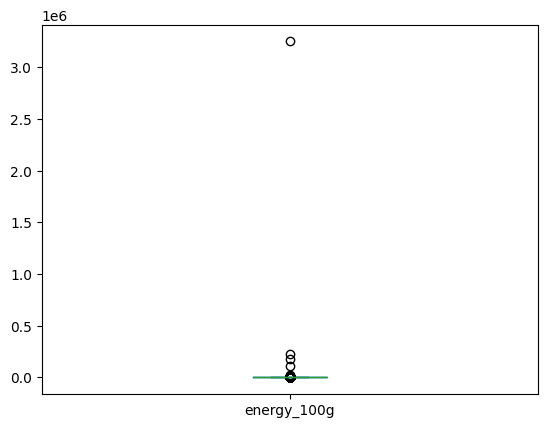

In [ ]:
# La variable "energy_100g"
data["energy_100g"].plot.box()

<Axes: >

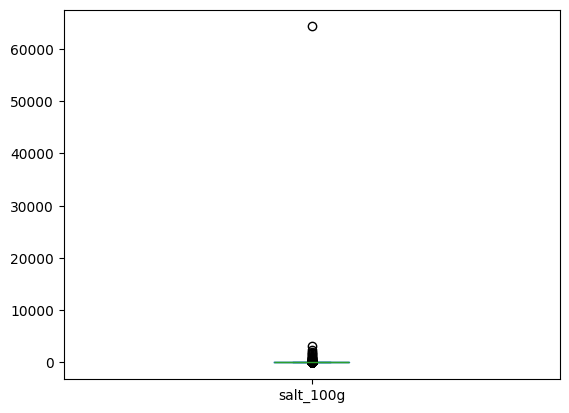

In [ ]:
# La variable "salt_100g"
data["salt_100g"].plot.box()

<Axes: >

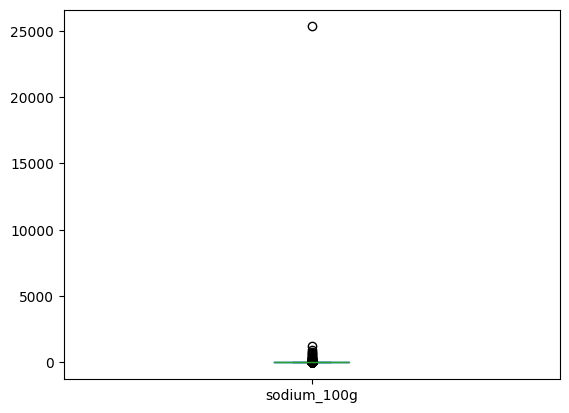

In [ ]:
# La variable "sodium_100g"
data["sodium_100g"].plot.box()

<Axes: >

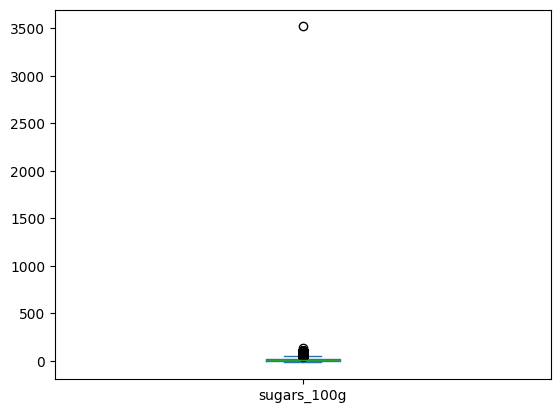

In [ ]:
# La variable "sugars_100g"
data["sugars_100g"].plot.box()

<Axes: >

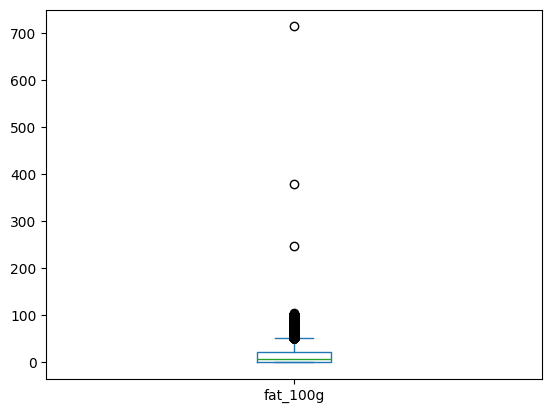

In [ ]:
# La variable "fat_100g"
data["fat_100g"].plot.box()

<Axes: >

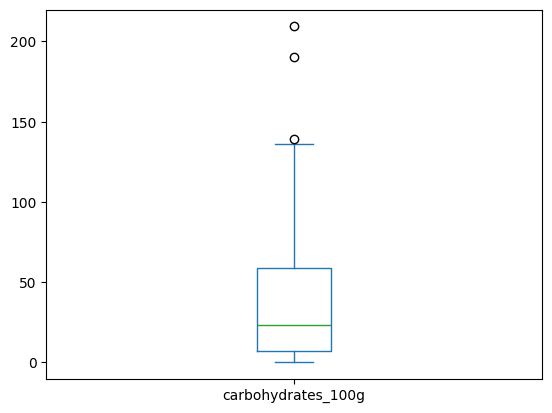

In [ ]:
# La variable "carbohydrates_100g"
data["carbohydrates_100g"].plot.box()

<Axes: >

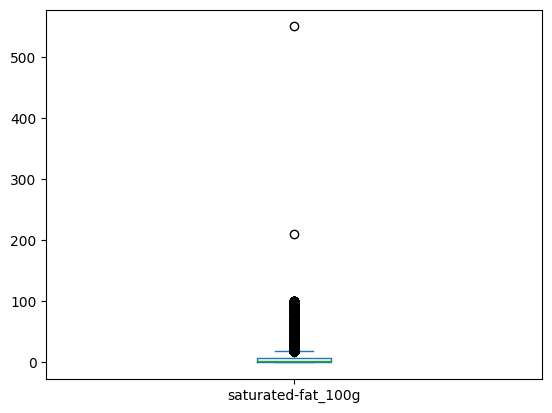

In [ ]:
# La variable "saturated-fat_100g"
data["saturated-fat_100g"].plot.box()

<Axes: >

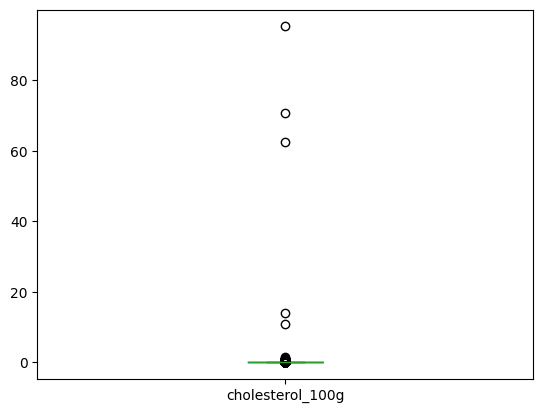

In [ ]:
# La variable "cholesterol_100g"
data["cholesterol_100g"].plot.box()

<Axes: >

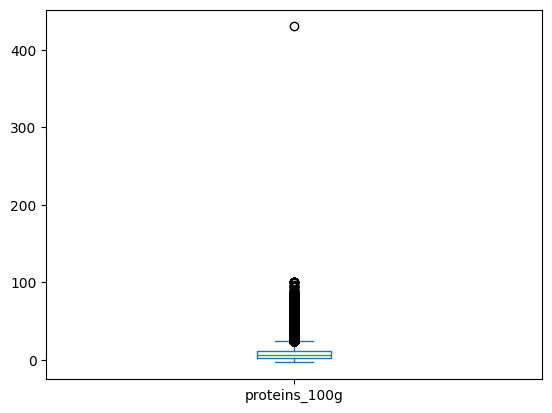

In [ ]:
# La variable "protein_100g"
data["proteins_100g"].plot.box()

Les boxplot relatifs à toutes les variables qualitatives de notre base de données confirment notre première lecture et donc l'existence de plusieurs outliers.
Ils existent plusieurs méthodes pour traiter les outliers (IQR, Z-score etc.). Pour ce projet, j'applique des filtres basés sur des données scientifiques et ce afin de garder les valeurs cohérentes même si elles s'écartent de la moyenne.

#### Suppression des outliers par application de filtres

##### La variable "energy_100g"

Pour cette opération, je me base sur des données scientifiques selon lesquelles les aliments les plus énergétiques sont les lipides et en particulier les huiles pures. A titre d'exemple, l'huile d'avocat contient 9000 calories aux 100 grammes.
Dans ma base de données, je ne garderai que les produits avec maximum 9000 calories aux 100 millilitres.
Pour rappel, cette variable est exprimée en calories pour 100 millilitres ou grammes.

In [ ]:
data = data[(data.energy_100g <= 90000)]

##### La variable "salt_100g"

 Comme pour la variable "energy_100g", je mets en place un filtre ne permettant de garder que les produits contenants au maximum 100 grammes de sel aux 100 grammes de produit.

In [ ]:
data = data[(data.salt_100g <= 100)]

##### La variable "sodium_100g"

Le sel de table blanc non iodé et non fluoré détient le record du monde de la teneur en sodium. Celle-ci s'élève à 39100 milligrammes au 100 grammes, soit 39.10 grammes.
La variable "sodium_100g" est exprimée en gramme.

In [ ]:
data = data[(data.sodium_100g <= 39.1)]

##### La variable "sugars_100g"

Le tableau 'describe' indique la présence de valeurs négatives ce qui n'est pas cohérent. Il indique aussi de valeurs anormalement élevées sachant que la valeur maximale admissible ne peut dépasser 100 grammes de sucre au 100 grammes de produit. C’est notamment le cas du produit sucre.

In [ ]:
data = data[(data.sugars_100g <= 100) & (data.sugars_100g >= 0)]

##### La variable "fat_100g"

La valeur maximale admissible pour cette variable est 100 grammes de gras pour 100 grammes de produit. C'est, par exemple, le cas des huiles.

In [ ]:
data = data[(data.fat_100g<= 100)]

##### La variable "carbohydrates_100g"

Les carbohydrates sont les glucides, ceux-ci se divisent en deux groupes principaux, les glucides simples comme le sucre et les glucides complexes qu'on trouve en grande quantité dans les céréales, par exemple.
Le sucre contient 100% de glucides. 100 grammes de sucre équivaut à 100 grammes de glucides d'où le filtre ci-dessous :

In [ ]:
data = data[(data.carbohydrates_100g<= 100)]

##### La variable "saturated-fat_100g"

En matière d'acides gras saturés, l'huile de noix de coco est la championne du monde, elle en contient 92%, soit, 92 grammes de gras saturé pour 100 millilitres d'huile. Le filtre ci-dessous se base sur cette valeur.

In [ ]:
data = data[data['saturated-fat_100g'] <= 92]

##### La variable "cholesterol_100g"

Selon l'Agence Nationale de Sécurité Sanitaire de l'Alimentation, la cervelle de veau cuite contient en moyenne 3.1 grammes de cholestérol aux 100 grammes de produit, ce qui place cet aliment en pole position en contenance en cholestérol.

In [ ]:
data = data[(data.cholesterol_100g<= 3.1)]

##### La variable "proteins_100g"

On distingue deux grandes familles de protéines : les protéines d'origine animale et les protéines d'origine végétale. La base de données "Openfoodfacts" ne fait pas la distinction entre les deux familles. La Spiruline est l'aliment qui contient le plus de protéines, elle en contient 57.5 grammes au 100 grammes. De même, le taux de protéines ne peut être négatif.

In [ ]:
data = data[(data.proteins_100g<= 57.5) & (data.proteins_100g >= 0)]

In [ ]:
data.describe()

,energy_100g,salt_100g,sodium_100g,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,cholesterol_100g,proteins_100g
count,217991.000000,217991.000000,217991.000000,217991.000000,217991.000000,217991.000000,217991.000000,217991.000000,217991.00000
mean,1176.963458,1.219107,0.479963,14.999822,13.344404,33.077853,4.933783,0.010861,7.70170
std,768.968701,3.720450,1.464743,19.810148,16.172709,28.260469,7.426957,0.028678,7.76534
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,452.000000,0.100000,0.039370,1.300000,0.880000,7.000000,0.000000,0.000000,1.90000
50%,1188.000000,0.650000,0.255906,5.000000,7.140000,23.572000,1.790000,0.000000,5.66000
75%,1715.000000,1.361440,0.536000,23.000000,21.430000,59.000000,7.140000,0.000000,10.71000
max,22000.000000,99.291140,39.091000,100.000000,100.000000,100.000000,92.000000,1.291000,57.14000


##### Aprés application des filtres

<Axes: >

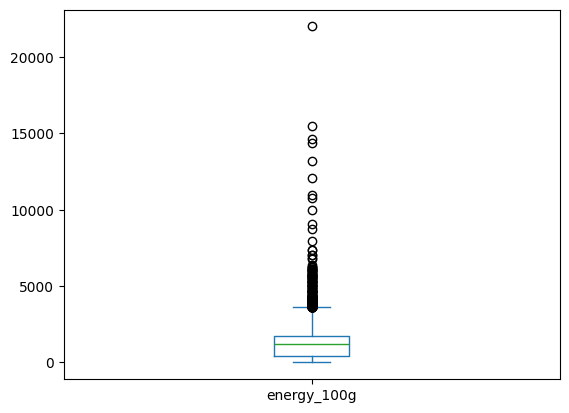

In [ ]:
# La variable "energy_100g"
data["energy_100g"].plot.box()

<Axes: >

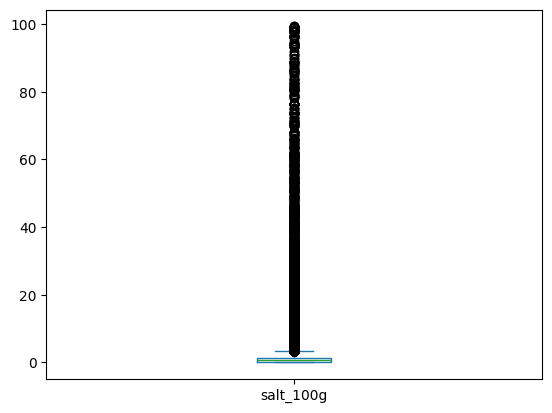

In [ ]:
# La variable "salt_100g"
data["salt_100g"].plot.box()

<Axes: >

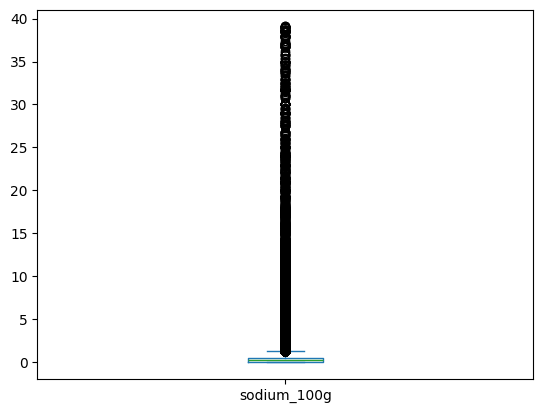

In [ ]:
# La variable "sodium_100g"
data["sodium_100g"].plot.box()

<Axes: >

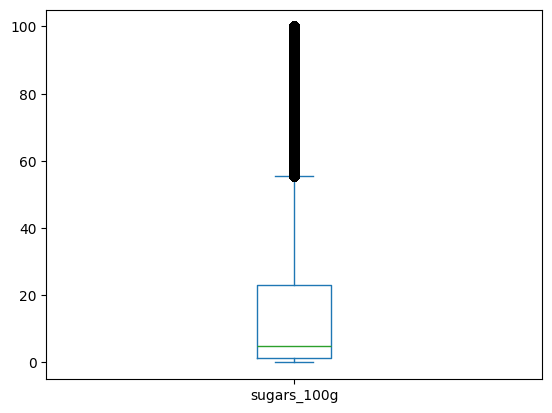

In [ ]:
# La variable "sugars_100g"
data["sugars_100g"].plot.box()

<Axes: >

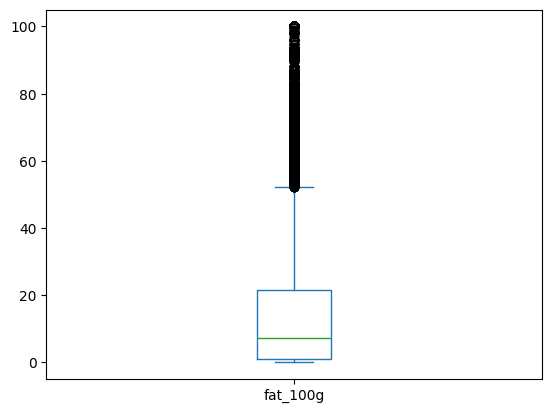

In [ ]:
# La variable "fat_100g"
data["fat_100g"].plot.box()

<Axes: >

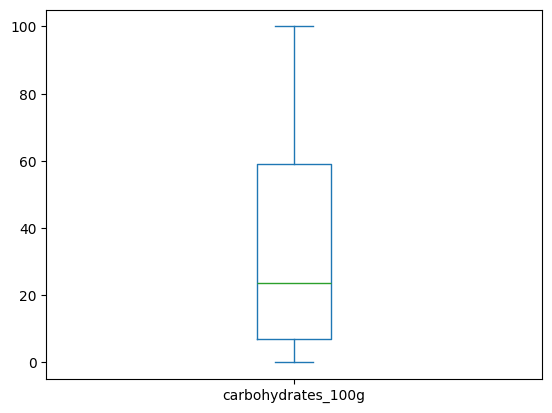

In [ ]:
# La variable "carbohydrates_100g"
data["carbohydrates_100g"].plot.box()

<Axes: >

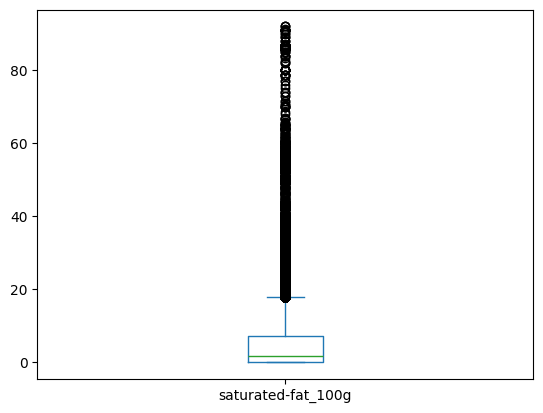

In [ ]:
# La variable "saturated-fat_100g"
data["saturated-fat_100g"].plot.box()

<Axes: >

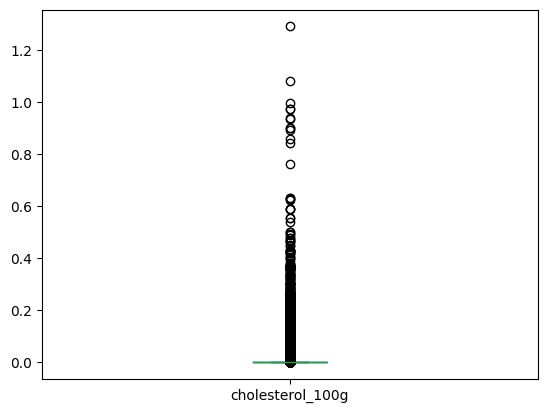

In [ ]:
# La variable "cholesterol_100g"
data["cholesterol_100g"].plot.box()

<Axes: >

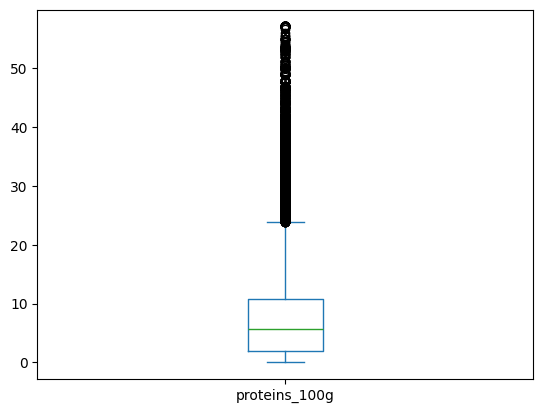

In [ ]:
# La variable "protein_100g"
data["proteins_100g"].plot.box()

L'application des filtres à permit de traiter efficacement les outliers. Toutes les observations de notre dataframe sont cohérentes et logiques même si certaines s'écartent nettement de le moyenne.

### Recherche et traitement des valeurs dupliquées

### Identification des valeurs dupliquées

L'identification des valeurs dupliquées se fera en sa basant sur la variable "code" car chaque ligne correspond à un code unique et donc un produit unique.

In [ ]:
data.loc[data[["code"]].duplicated(keep=False),:].shape

(114, 13)

### Suppression des valeurs dupliquées

In [ ]:
data.drop_duplicates(subset=['code'], inplace=True)

In [ ]:
data.shape

(217934, 13)

In [ ]:
#Je réinitialise l'index.
data.reset_index(drop=True, inplace=True)

Notre base de donnée finale se compose de 21794 lignes. Nous n'avons plus de valeurs abérrantes, manquantes ou dupliquées.

### Export de la base de données au format csv

In [ ]:
# Définir le chemin de sauvegarde sur Google Drive
save_directory = '/content/drive/My Drive/olist_data/nutri_score_database.csv'

# Sauvegarde du DataFrame
data.to_csv(save_directory, index=False)

In [ ]:
data

,code,countries_fr,product_name,nutrition_grade_fr,energy_100g,salt_100g,sodium_100g,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,cholesterol_100g,proteins_100g
0,4530,États-Unis,Banana Chips Sweetened (Whole),d,2243.0,0.00000,0.000000,14.29,28.570,64.29,28.57,0.018,3.57
1,4559,États-Unis,Peanuts,b,1941.0,0.63500,0.250000,17.86,17.860,60.71,0.00,0.000,17.86
2,16087,États-Unis,Organic Salted Nut Mix,d,2540.0,1.22428,0.482000,3.57,57.140,17.86,5.36,0.000,17.86
3,16124,États-Unis,Organic Muesli,c,1833.0,0.13970,0.055000,15.62,18.750,57.81,4.69,0.000,14.06
4,16872,États-Unis,Zen Party Mix,d,2230.0,1.60782,0.633000,3.33,36.670,36.67,5.00,0.000,16.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217929,9787461062105,États-Unis,Natural Cassava,a,1477.0,0.03048,0.012000,2.35,0.000,87.06,0.00,0.000,1.18
217930,9847548283004,France,Tartines craquantes bio au sarrasin,a,1643.0,0.68000,0.267717,2.60,2.800,74.80,0.60,0.000,13.00
217931,9900000000233,France,Amandes,b,2406.0,0.10000,0.039370,3.89,49.286,21.43,3.73,0.000,21.22
217932,99111250,France,Thé vert Earl grey,c,21.0,0.02540,0.010000,0.50,0.200,0.50,0.20,0.000,0.50


### Exploration graphique des données.

#### La variable "energy_100g"

#### La variable "salt_100g"

#### La variable "sodium_100g"

#### La variable "sugars_100g"

#### La variable "fat_100g"

#### La variable "carbohydrates_100g"

#### La variable "saturated-fat_100g"

#### La variable "cholesterol_100g"

#### La variable "protein_100g"

#### La variable "nutrition_grade_fr"

In [ ]:
import plotly.express as px

# Création d'un DataFrame pour le comptage des valeurs
df_counts = data['nutrition_grade_fr'].value_counts().reset_index()
df_counts.columns = ['nutrition_grade_fr', 'count']

# Création du graphique en secteurs avec Plotly
fig = px.pie(df_counts,
             names='nutrition_grade_fr',
             values='count',
             title="Distribution de la variable nutrition_grade_fr",
             labels={'nutrition_grade_fr': 'Nutri-Score'},
             hole=0)  # Mettre un chiffre entre 0 et 1 pour un effet donut

# Affichage du graphique
fig.show()

### Analyse bivariée

##### Relation entre les variables "cholesterol_100g" et "nutrition_grade_fr"

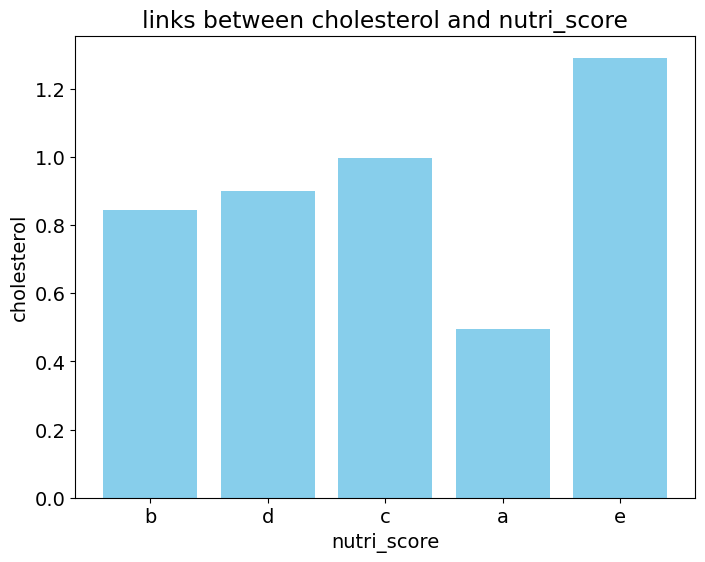

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(data['nutrition_grade_fr'], data['cholesterol_100g'], color='skyblue')
plt.title('links between cholesterol and nutri_score')
plt.xlabel('nutri_score')
plt.ylabel('cholesterol')
plt.show()

##### L'analyse du barplot ci-dessus laisse penser qu'il existe une corrélation entre le taux de cholestérol et le nutri score. Le nutri score "a" obtient le plus faible taux de cholestérol alors que le nutri score "e" obtient le score le plus élevé en matière de cholestérol.


### Relation entre les variables "cholesterol_100g" et "energy_100g"

### Relation entre les variables "cholesterol_100g" et "carbohydrates_100g"

### Recherche de correlation entre la variable "cholesterol_100g", la variable "sugars_100g"

### Relation entre les variables "cholesterol_100g" et "fat_100g"

#### Relation entre les variables "cholesterol_100g" et "saturated-fat_100g"

### Relation entre les variables "cholesterol_100g" et "sodium_100g"    

### Relation entre les variables "cholesterol_100g" et "protein_100g"    

##### Création de catégories de "cholesterol_100g"

In [ ]:
data.loc[(data["cholesterol_100g"] == 0), 'class_cholesterol'] = 'low cholesterol'

data.loc[(data["cholesterol_100g"] > 0) & (data['cholesterol_100g'] <=0.1), 'class_cholesterol'] = 'medium cholesterol'

data.loc[(data["cholesterol_100g"] > 0.1), 'class_cholesterol'] = 'high cholesterol'

In [ ]:
data.head(3)

,code,countries_fr,product_name,brands,nutrition_grade_fr,energy_100g,salt_100g,sodium_100g,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,cholesterol_100g,protein_100g,class_cholesterol
0,4559,États-Unis,Peanuts,Torn & Glasser,b,1941.0,0.63500,0.250,17.86,17.86,60.71,0.00,0.0,17.86,low cholesterol
1,16087,États-Unis,Organic Salted Nut Mix,Grizzlies,d,2540.0,1.22428,0.482,3.57,57.14,17.86,5.36,0.0,17.86,low cholesterol
2,16124,États-Unis,Organic Muesli,Daddy's Muesli,c,1833.0,0.13970,0.055,15.62,18.75,57.81,4.69,0.0,14.06,low cholesterol


In [ ]:
data['class_cholesterol'].value_counts()

low cholesterol       163710
medium cholesterol     47068
high cholesterol        4693
Name: class_cholesterol, dtype: int64

#### Corrélation entre les variables "cholesterol_100g" et "fat_100g"

La pvalue est inférieure à 0.05, je rejette, donc, l'hypothèse nulle d'indépendance.
La teneur en gras affecte significativement la teneur en cholesterol.

#### Corrélation entre les variables "cholesterol_100g" et "energy_100g"

#### Corrélation entre les variables "cholesterol_100g" et "protein_100g"

### Respect des 5 grands principes du RGPD

Selon la définition du CNIL (Commission Nationale Informatique et Libertés), le Règlement Générale sur la Protection des Données (RGPD) est régi par cinq grands principes :

LE PRINCIPE DE FINALITÉ
Les données sont collectées pour un but bien déterminé et légitime et ne sont pas traitées ultérieurement de façon incompatible avec cet objectif initial. Ce principe limite la manière dont le responsable de traitement pourra utiliser ou réutiliser ces données dans le futur.
##### Nous utilisons des données publiques en open source sans aucunes informations à caractère  personnel.

LE PRINCIPE DE PERTINENCE
Seules les données strictement nécessaires à la réalisation de l’objectif poursuivi doivent être collectées. Il s’agit donc de minimiser autant que possible la collecte des données.

##### Pour les besoins du projet nous ne collectons aucunes données à caractère personnel.

LE PRINCIPE DE DURÉE LIMITÉE DE CONSERVATION
Les données ne doivent être conservées sous une forme identifiante et en « base active » que le temps nécessaire à la réalisation de l’objectif poursuivi et doivent être par la suite détruites, anonymisées ou archivées dans le respect des obligations légales applicables en matière de conservation des archives publiques.

##### Les données utilisées pour la réalisation du projet ne sont en aucun cas des données personnelles. L'identité des contributeurs n'est pas accessible aux utilisateurs, ni même, à nos équipes. Les données du dataframe qui sert au projet sont anonymisées.

LE PRINCIPE DE SÉCURITÉ
Le responsable de traitement de la collectivité doit prendre toutes les mesures utiles pour garantir l’intégrité et la confidentialité de ces données, en s’assurant notamment que des tiers non autorisés n’y auront pas accès. Ces mesures seront déterminées en fonction des risques (sensibilité des données, objectif du traitement) et seront à la fois d’ordre physique, logique, technique et organisationnel (sécurisation des locaux, armoires et postes de travail, gestion stricte des habilitations et droits d’accès informatiques, encadrement des opérations sous-traitées).

##### Pour les besoins du projet nous n'avons accès qu'à des données publiques n'ayant pas de caractère personnel. La garantie d'intégrité et de confidentialité des données incombe à l'hébergeur qui seul a accès aux données personnelles de ses contributeurs.
